## Vitol: Data Science Test

Please review all cells, following instructions for each and adding code and commentary where required.

The goal of this test is not optimal models or code, but rather to observe your problem solving approach.


January 2021

### Python Warmup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import datetime as dt
import itertools
from dataclasses import dataclass

import statsmodels.tsa.api as tsa
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, q_stat, adfuller
from scipy.stats import probplot, moment
from fbprophet import Prophet
import statsmodels.tsa.api as tsa
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, q_stat, adfuller
from scipy.stats import probplot, moment
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
%load_ext watermark
%watermark 

Last updated: 2021-06-13T11:44:14.676903+01:00

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 20.5.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit



In [3]:
%watermark -p fbprophet,numpy,pandas,plotly,seaborn,matplotlib,statsmodels,sklearn

fbprophet  : 0.7.1
numpy      : 1.19.5
pandas     : 1.2.2
plotly     : 4.14.3
seaborn    : 0.11.1
matplotlib : 3.3.2
statsmodels: 0.12.2
sklearn    : 0.0



## Generator

In [4]:
## 
# Write a simple generator for the source data below, and iterate through it.
# For each element e, store the value of the following function, or catch and handle the specific errors
# that arise in attempting to execute the function: f(e) = NaturalLog(e) / e
# On error for element e, report appropriate message and store an error value for e.

source_data = [1,2,3,-2,4,3,"two",5,0,7,8,9,"one","two","three", 25]

# Briefly explain the benefits of generators and of error handling in general
# Add code

def log_gen(nums):
    for i in nums:
        try:
            if i < 0:
                print('Negative Value Error: can not take the logarithm of a negative number (input: {})'.format(i))
                
            elif i == 0:
                print('The log of 0 is undefined')
                
            else:
                yield (np.log(i)/i)
                
        except TypeError:
            print('Type Error: Input is not a numerical value (input: {})'.format(i))

        except: 
            print('Unknown error has occured')   
                        
gen = log_gen(source_data)

for num in gen:
        print(num)

0.0
0.34657359027997264
0.3662040962227033
Negative Value Error: can not take the logarithm of a negative number (input: -2)
0.34657359027997264
0.3662040962227033
Type Error: Input is not a numerical value (input: two)
0.32188758248682003
The log of 0 is undefined
0.277987164150759
0.25993019270997947
0.24413606414846883
Type Error: Input is not a numerical value (input: one)
Type Error: Input is not a numerical value (input: two)
Type Error: Input is not a numerical value (input: three)
0.128755032994728


<b>Benefits:</b>
- Generators: Generator functions allow you to declare a function that behaves like an iterator. Generators use the yield statement, which works in a similar fashion. Iterators allow lazy evaluation, only generating the next element of an iterable object when requested. This is useful for very large data sets.  The difference is that it saves the state of the function. The next time the function is called, the execution continues from where it left off, with the same variable values it had before yielding. 

- Error Handling: The benefits of Error handling is that It I can help the user Identify issues with the code as well as find a user defined solution once an error arrives with the uses of exceptions for example. This in the long term will make the code more efficient and especially help on projects with multiple users inputting code. 
PyTest is a great frame work to write small tests that help when building larger applications and libararies. 

## Class

In [5]:
#  Please write a number of classes to process and represent simple data, as follows:
#   1 - A superclass to represent a single data entry with two features. Superclass should have functionality to
#       store underlying "raw" data and to display formatted data.
#       Extend with a subclass to represent an entry from a more specific source containing additional numerical
#       data. 
#   2 - A factory class to produce an object given a "row" of input data, such as might be obtained from reading 
#       in a CSV file.
#   3 - Iterate over all sample rows given below ('rows'), using the factory to create objects.
#   4 - Very briefly describe why this type of code might be valuable or important.
#
# Note: include code to "standardize" data from each row (process strings, ensure data types, etc)


super_rows = [
    ["Pegasus", "True"],
    ["Unicorn", "False"]
]
sub_rows = [
    ["Alicorn", "23.1", "True"],
    ["basilisk", "120.433", "False"],
    ["ChiMera", "101.2", "False"],
    ["Griffin", "65.88", "True"],
    ["Nemean lion", "2,465.21", "False"],
    ["0rthros", "52.01", "False"],
    ["Cockatrice", "nan", "True"],
]

rows = super_rows + sub_rows

# Add ingestion code here

In [6]:
@dataclass
class ParentClass:
    str_var: str
    bool_var: str

    def process_row(self, return_values=True, print_values=False):
        str_var_format = self._clean_string(self.str_var)
        bool_var_format = self._clean_bool(self.bool_var)
        if print_values:
            print(f'Name is: { str_var_format }\nBinary is: { bool_var_format } ' )
        if return_values:
            return str_var_format, bool_var_format
        
    def _clean_string(self, str_var):
        return self.str_var.lower().capitalize()
        
    def _clean_bool(self, bool_var):
        return True if self.bool_var.lower() == 'true' else False 

In [7]:
# instance of the "ParentClass"
parent = ParentClass("Pegasus", "True")

In [8]:
# stored values
print(parent.str_var)
print(parent.bool_var)

Pegasus
True


In [9]:
# display formated (no return)
parent.process_row(return_values=False, print_values=True)

Name is: Pegasus
Binary is: True 


In [10]:
@dataclass
class ChildClass(ParentClass):
    num_var: str
    
    def process_row(self, return_values=True, print_values=False):
        str_var_format = self._clean_string(self.str_var)
        bool_var_format = self._clean_bool(self.bool_var)
        try:
            num_var_format = float(self.num_var)
        except:
            num_var_format = np.nan
            
        if print_values:
            print(f'Name is: { str_var_format }\nBinary is: {bool_var_format} \nValue is: {num_var_format}' )
        if return_values:
            return str_var_format, num_var_format, bool_var_format

In [11]:
# instance of the "ParentClass"
child = ChildClass(str_var="Alicorn", num_var="23.1", bool_var="True")

In [12]:
# stored values
print(child.str_var)
print(child.bool_var)
print(child.num_var)

Alicorn
True
23.1


In [13]:
# display formated 
child.process_row(return_values=False, print_values=True)

Name is: Alicorn
Binary is: True 
Value is: 23.1


In [14]:
class FactoryClass:
    def process_row(example):
        if len(example) == 2:
            parent_instance = ParentClass(str_var=example[0], bool_var=example[1])
            return parent_instance.process_row()
        else:
            child_instance = ChildClass(str_var=example[0], num_var=example[1], bool_var=example[2])
            return child_instance.process_row()   

In [15]:
row = FactoryClass.process_row(["Alicorn", "23.1", "True"])
row

('Alicorn', 23.1, True)

In [16]:
for example in rows:
    row = FactoryClass.process_row(example)
    print(row)

('Pegasus', True)
('Unicorn', False)
('Alicorn', 23.1, True)
('Basilisk', 120.433, False)
('Chimera', 101.2, False)
('Griffin', 65.88, True)
('Nemean lion', nan, False)
('0rthros', 52.01, False)
('Cockatrice', nan, True)


In [17]:
# We can then process these objects into databases, dataframes etc

<b>Benefits</b>: A class like this Is great for digesting data and making sure the output values are in the correct format. The factory class allows you to control complex logical paths and new logical paths without necessity to change old code.


This type of code is helpful to process data in large datasets because using the code, we can format our data in the we want them. 
Converting data types, formatting strings, and removing unnecessary or mis formatted data entries can be done easily using this. 
Also, this code can be extended further more to do our desire task.

## Apple Mobility

### Investigating  Data

In [18]:
##
# Download the apple mobility dataset, found here: https://www.apple.com/covid19/mobility 
# (click the "all data csv" button). Read in the raw data, and filter out all but Denmark and Norway.
# Resample the time series data to weekly granularity, and determine if you think mobility between the two
# countries are correlated or not.

# Add code
# Briefly explain your conclusion about mobility correlation

Toggle the button to hide code for commentary and outputs only. (Easy to read the flow of the notebook)

In [19]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [20]:
def crosscorr(datax, datay, lag=0):
    return datax.corr(datay.shift(lag))

In [21]:
RAW_DATA_DIR = '../data/raw/'
filename = 'applemobilitytrends-2021-06-09.csv'

In [22]:
df_mobility = pd.read_csv(RAW_DATA_DIR + filename)

In [23]:
df_all = pd.melt(df_mobility, id_vars=['region', 'transportation_type'], value_vars=list(df_mobility.columns[6:]),
                 var_name='Date',  value_name='mobility')

df_all['Date']= pd.to_datetime(df_all['Date'])

# Check each date has the same amount of data points.
assert (df_all.groupby(['Date']).agg({'transportation_type': 'count'}).transportation_type != 4691).sum() == 0

In [24]:
# if you are running the code with newer data this will cap it to the data that i used
df_all = df_all[df_all['Date'] <= '2021-06-09']

In [25]:
# filter selected countries 
country_1 = 'Denmark'
country_2 = 'Norway'

countries_list = [country_1, country_2]
df_countries = df_all[df_all.region.isin(countries_list)]

# Aggregate Transportation types for overal correlation analysis
df_agg = df_countries.groupby(['Date', 'region']).agg({'mobility': 'sum'}).reset_index()
df_agg = df_agg.pivot(index="Date", columns="region", values="mobility")
df_agg_w = df_agg.resample('w').mean()

In [26]:
def correlation_scatter_plot(df, country_1, country_2, axes):
    points = axes.scatter(df[country_1],
                         df[country_2],
                         c=np.linspace(0.1, 1, len(df)), 
                         s=15, 
                         cmap='winter')
    axes.set_title('Mobility Correlation over Time')
    cbar = plt.colorbar(points, ax=axes)
    cbar.ax.set_yticklabels([str(p.year) for p in df[::len(df)//10].index]);

    sns.regplot(x=country_1, y=country_2, 
                data=df, 
                scatter=False, 
                color='k',
                line_kws={'lw':1, 
                          'ls':'--'},
                ax=axes)
    axes.text(x=.05, y=.8, s='Pearson Correlation: {:.03f}'.format(crosscorr(df[country_1], df[country_2])), 
                 transform=axes.transAxes)
    
def rolling_correlation_plot(df, country_1, country_2, axes, transportation_type='all'):
    
    if transportation_type != 'all':
        df = df.loc[:, idx[:, transportation_type]].droplevel('transportation_type', axis=1)
    
    pd.DataFrame({
    '4 Week Rolling Correlation': df.dropna()[country_1].rolling(4).corr(df.dropna()[country_2]),
    '8 Week Rolling Correlation': df.dropna()[country_1].rolling(8).corr(df.dropna()[country_2]),
    '12 Week Rolling Correlation': df.dropna()[country_1].rolling(12).corr(df.dropna()[country_2]),
    }).plot(color=['orange', 'b', 'r'], ax=axes)
    axes.set_title('Rolling Correlation')
    axes.set_ylabel('pearson r')
    

def lagged_correlation_plot(df, country_1, country_2, lag_len, axes):
    rs = [crosscorr(df[country_1],df[country_2], lag) for lag in range(-lag_len,lag_len)]
    axes.plot(rs, color='black')
    axes.axvline(np.argmax(rs),color='r',linestyle='--',label='Highest Correlation Value')
    axes.set_xticklabels([int(item-lag_len) for item in axes.get_xticks()]);
    axes.legend(loc='upper right')
    axes.set_title('Time Lagged Cross Correlation')
    axes.set_ylabel('pearson r')
    axes.set_xlabel('Lag (Weeks)')
    lag_corr = pd.DataFrame({'Lag': np.arange(-lag_len, lag_len),
                'corr': rs})
    axes.text(x=.02, y=.95, s='Highest Corr Lag: {:.0f} ({:.03f})'.format(lag_corr.loc[lag_corr.idxmax()[1]][0], 
                                                                       lag_corr.loc[lag_corr.idxmax()[1]][1]), 
                 transform=axes.transAxes)

def correlation_analysis(data, c_1, c_2):
    fig = plt.figure(figsize=(14,14))

    # Layout 
    layout = (3, 2)

    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=1)
    corr_ax = plt.subplot2grid(layout, (0, 1), colspan=1)
    roll_ax = plt.subplot2grid(layout, (1, 0), colspan=1)
    lag_ax = plt.subplot2grid(layout, (1, 1), colspan=1)

    # Time series
    sns.lineplot(data=data, ax=ts_ax)
    ts_ax.set_title('Mobility: {} & {}'.format(c_1, c_2))
    ts_ax.set_ylabel('Mobility')

    # Scatter Correlation 
    correlation_scatter_plot(data, c_1, c_2, corr_ax)

    # Rolling Correlation
    rolling_correlation_plot(data, c_1, c_2, roll_ax)

    # Lagged Correlation
    lagged_correlation_plot(data, c_1, c_2, 30, lag_ax)


    sns.despine()
    plt.tight_layout()

## Denmark and Norway: Mobility

### All (Aggregated Transportation)

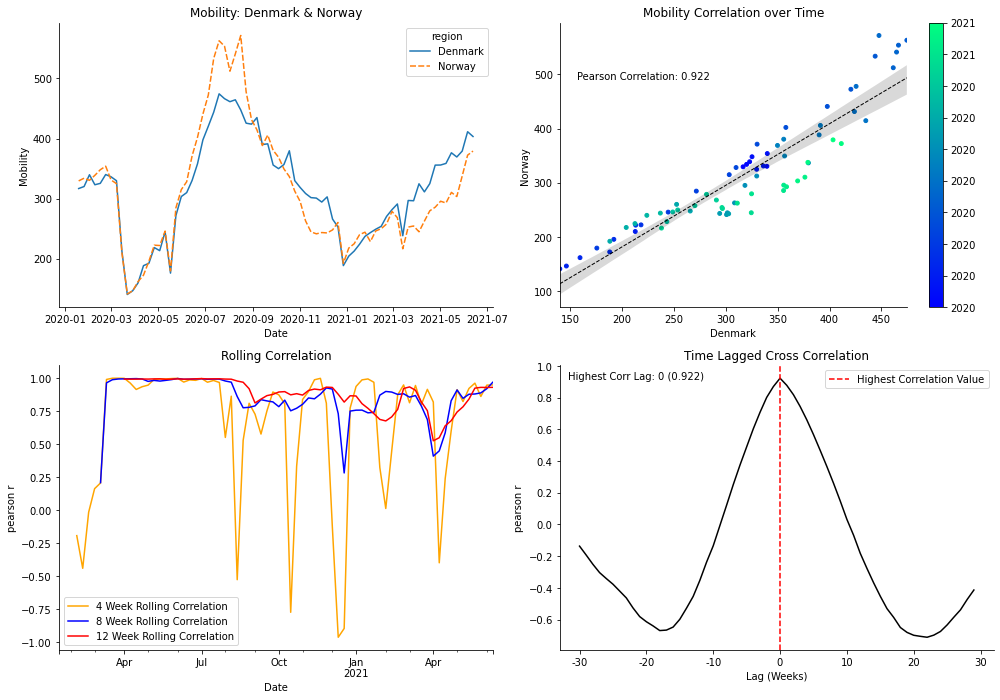

In [27]:
correlation_analysis(df_agg_w, country_1, country_2)

Looking at the above analysis on the Cross Correlation between Denmark and Norway aggregated mobility. We notice that the pearson correlation value is 0.924 when using the whole dataset, this high postive correlation value can be seen using the line plot.
<br><br>
The bottom left plot looks at the rolling cross correlation using 4, 8 and 12 week windows. 
- 4 week rolling correlation: We notice that there is some volatility in the 4 week rolling correlation, displaying periods of high negative correlation, which highlights the that in the short term the correlation between Denmark and Norway can switch from positive to inverse correlation, however, when viewing the 8 and 12 week rolling correlation we notice that over longer periods the correlation remains relatively positive and high with only a few periods of dropping correlation to values around 0.3. 
<br><br>
Lastly the bottom right visual, displays time lagged cross correlation, the aim of this is to identify whether the time series has a lagged relationship. The pearson correlation value remains the highest with no time lag. <br><br>
- An interesting piece of analysis would be to look at the time lagged cross correlation against various rolling windows on a heatmap (not appropriate in this case due whats being asked). 

In [28]:
##
# Take your weekly resampled data for both countries, and plot it broken up into the three types of mobility.
# Now add week-on-week changes to the plot, using a 2nd axis. Also include the results of your 
# correlation investigation in the previous cell.

# Add code

### Analysing Different transportation types

In the interest of not producing to many plots, I've reduced the correlation analysis to the line plot that displays the pearson correlation coefficient with the rolling cross correlation plot. 

In [29]:
idx = pd.IndexSlice

In [30]:
df_countries.set_index('Date', inplace=True)

In [31]:
df_w = df_countries.groupby(['region', 'transportation_type']).resample('w').mean().sort_values(by='Date').reset_index()
df_w = df_w.pivot(index="Date", columns=["region", "transportation_type"], values="mobility")

In [32]:
def interactive_mobility_plot(df, country):
    wow_df = df.groupby(['region', 'transportation_type']).resample('w').mean().sort_values(by='Date').reset_index()
    wow_df['week_on_week_change'] = wow_df.groupby(['region', 'transportation_type'])['mobility'].transform(pd.Series.diff).fillna(0)

    transportation_map = {
        'driving': 'Driving wow change',
        'walking': 'Walking wow change',
        'transit': 'Transit wow change'                 }

    wow_df['week_on_week_transportation_type'] = wow_df.transportation_type.map(transportation_map)

    subfig = make_subplots(specs=[[{"secondary_y": True}]])

    fig = px.line(wow_df[wow_df.region ==  country], x="Date", y='mobility', color='transportation_type')
    fig2 = px.line(wow_df[wow_df.region == country], x="Date", y='week_on_week_change', color='week_on_week_transportation_type', 
                   color_discrete_sequence=['orange', 'black', 'red'])

    fig2.update_traces(yaxis="y2")
    subfig.add_traces(fig.data + fig2.data)

    subfig.update_layout(
        plot_bgcolor="white",
        title='{}: Mobility & Week on Week Change'.format(country),
        xaxis_title="Date",
        yaxis_title="Mobility Value",

    )
    subfig.update_xaxes(showline=True, linewidth=1, linecolor='black')
    subfig.update_yaxes(showline=False, linewidth=1, linecolor='black', secondary_y=True,
                        title_text='Week on Week Change')

    subfig.show()

In [33]:
interactive_mobility_plot(df_countries, 'Denmark')

In [34]:
interactive_mobility_plot(df_countries, 'Norway')

#### Transportation Type Correlation

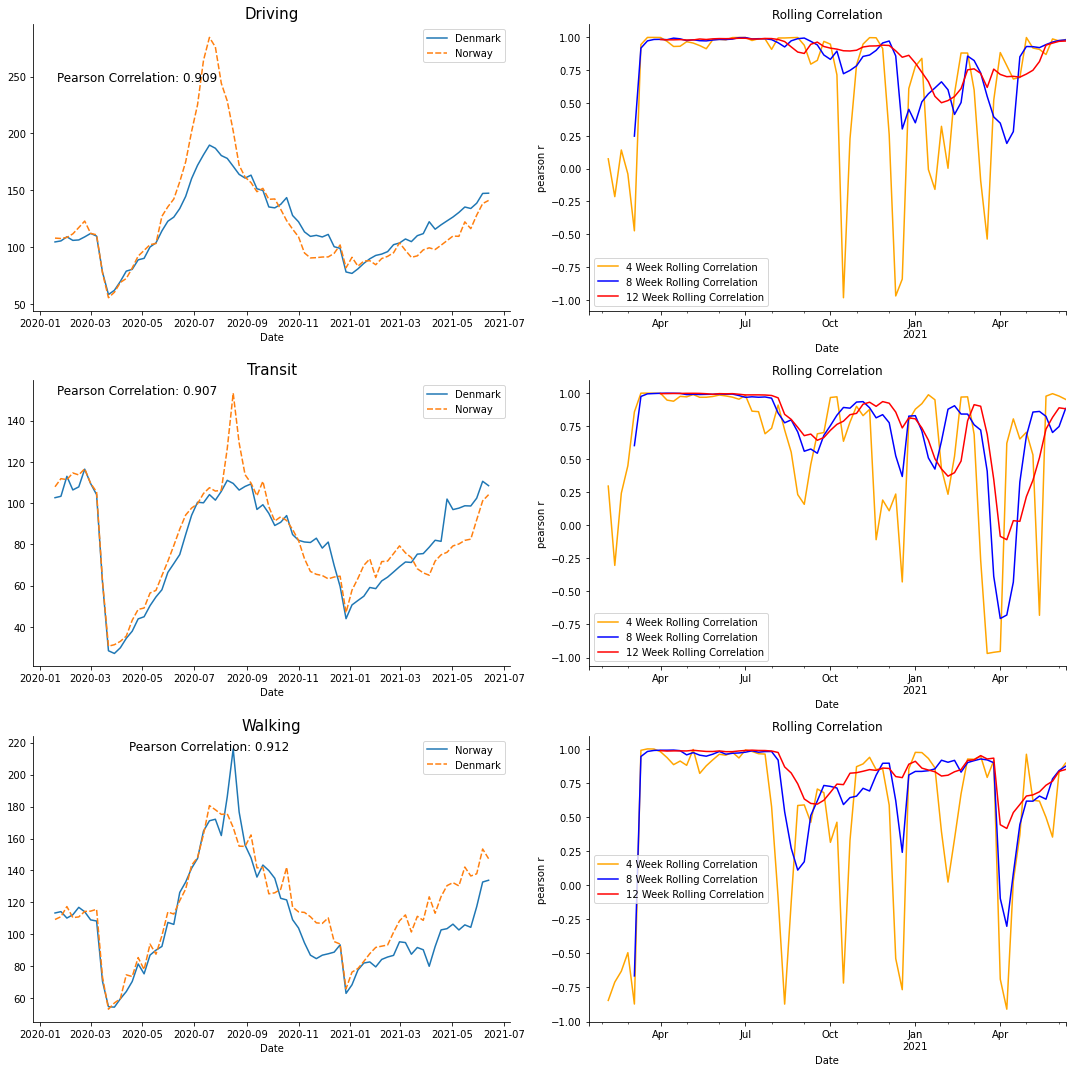

In [35]:
fig, axes = plt.subplots(figsize=(15,15), ncols=2, nrows=3)

axes[0][0].set_title('Driving', size=15)
df_driving = df_w.loc[:, idx[:,'driving']]
sns.lineplot(data=df_driving, ax=axes[0][0])
axes[0][0].text(x=.05, y=.8, fontsize=12,
          s='Pearson Correlation: {:.03f}'.format(crosscorr(df_driving[country_1].driving,
                                                            df_driving[country_2].driving)), 
          transform=axes[0][0].transAxes)

rolling_correlation_plot(df_w, country_1, country_2, axes[0][1], transportation_type='driving')

# Transit 
axes[1][0].set_title('Transit', size=15)
df_transit = df_w.loc[:, idx[:,'transit']]
sns.lineplot(data=df_transit, ax=axes[1][0])
axes[1][0].text(x=.05, y=.95, fontsize=12,
          s='Pearson Correlation: {:.03f}'.format(crosscorr(df_transit[country_1].transit,
                                                            df_transit[country_2].transit)), 
          transform=axes[1][0].transAxes)
rolling_correlation_plot(df_w, country_1, country_2, axes[1][1], transportation_type='transit')  

# Walking 
axes[2][0].set_title('Walking', size=15)
df_walking = df_w.loc[:, idx[:,'walking']]
sns.lineplot(data=df_walking, ax=axes[2][0])
axes[2][0].text(x=.20, y=.95, fontsize=12,
          s='Pearson Correlation: {:.03f}'.format(crosscorr(df_walking[country_1].walking,
                                                            df_walking[country_2].walking)), 
          transform=axes[2][0].transAxes)
rolling_correlation_plot(df_w, country_1, country_2, axes[2][1], transportation_type='walking') 
                                                        
sns.despine()
plt.tight_layout()

- <b>Driving</b>: Looking at the relationship between Denmark and Norway we see that the time series move together, however, there seems to be the varying positive to negative correlation in the short term 4 week rolling correlation that we also saw on an aggregated level. One point to note is that starting around mid may whilst correlation remains high the magnitude of growth in Norway exceeds Denmark significantly. 
- <b>Transit</b>: High Positive Correlation, however, around March of 2021 theres a swing to negative correlation at all rolling window time periods (4,8,12 week), which soon reversed towards the mean. 
- <b>Walking</b>: Correlation remained high and positive, however, past July of 2020 correlation have a lot of changes to negative coefficients. 

In [36]:
##
# Repeat the above two exercises, but now for Italy and the United States. 

# Add code
# Comment briefly on the differences between the two correlation comparisons and what might motivate them

In [37]:
# filter selected countries 
country_1 = 'United States'
country_2 = 'Italy'

countries_list = [country_1, country_2]
df_countries = df_all[df_all.region.isin(countries_list)]

# Aggregate Transportation types for overal correlation analysis
df_agg = df_countries.groupby(['Date', 'region']).agg({'mobility': 'sum'}).reset_index()
df_agg = df_agg.pivot(index="Date", columns="region", values="mobility")
df_agg_w = df_agg.resample('w').mean()

## United States and Italy: Mobility

### All (Aggregated Transportation)

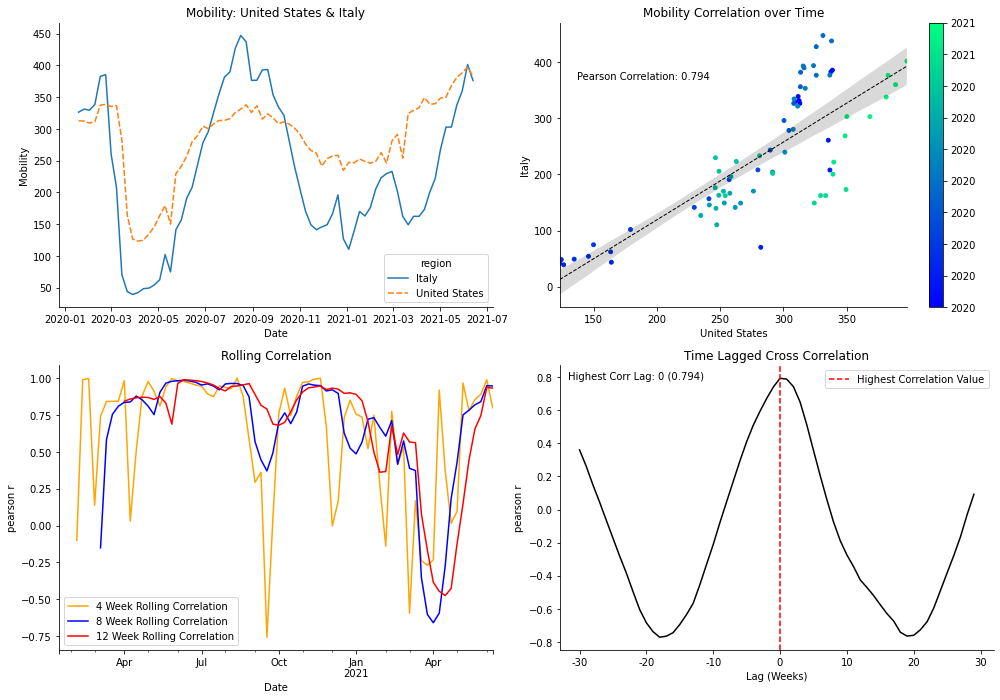

In [38]:
correlation_analysis(df_agg_w, country_1, country_2)

<b> Correlation </b>

Initally when looking at the time series between the US and Italy, we see that the both series follow the same trend which is shown by the pearson correlation coefficient of <b>0.780</b> which is less than Denmark vs Norway. Similar to the rolling correlation of the Denmark and Norway we notice periods of negative correlation, however, theres a longer period of the correlation decreasing towards a negative value at the start of 2021 as Italy's mobility trended upwards whist the US's mobility decreased and remained flat. 

### Analysing Different transportation types 

In [39]:
df_countries.set_index('Date', inplace=True)

In [40]:
df_w = df_countries.groupby(['region', 'transportation_type']).resample('w').mean().sort_values(by='Date').reset_index()
df_w = df_w.pivot(index="Date", columns=["region", "transportation_type"], values="mobility")

The graphs below look at the Mobility of the US and Italy broken down into the transportation types. Then plotted on the 2nd axis are the week on week changes for each of the transportation types. 


These plots been made interactive as they are cluttered. 

In [41]:
interactive_mobility_plot(df_countries, 'United States')

In [42]:
interactive_mobility_plot(df_countries, 'Italy')

#### Transportation Type Correlation

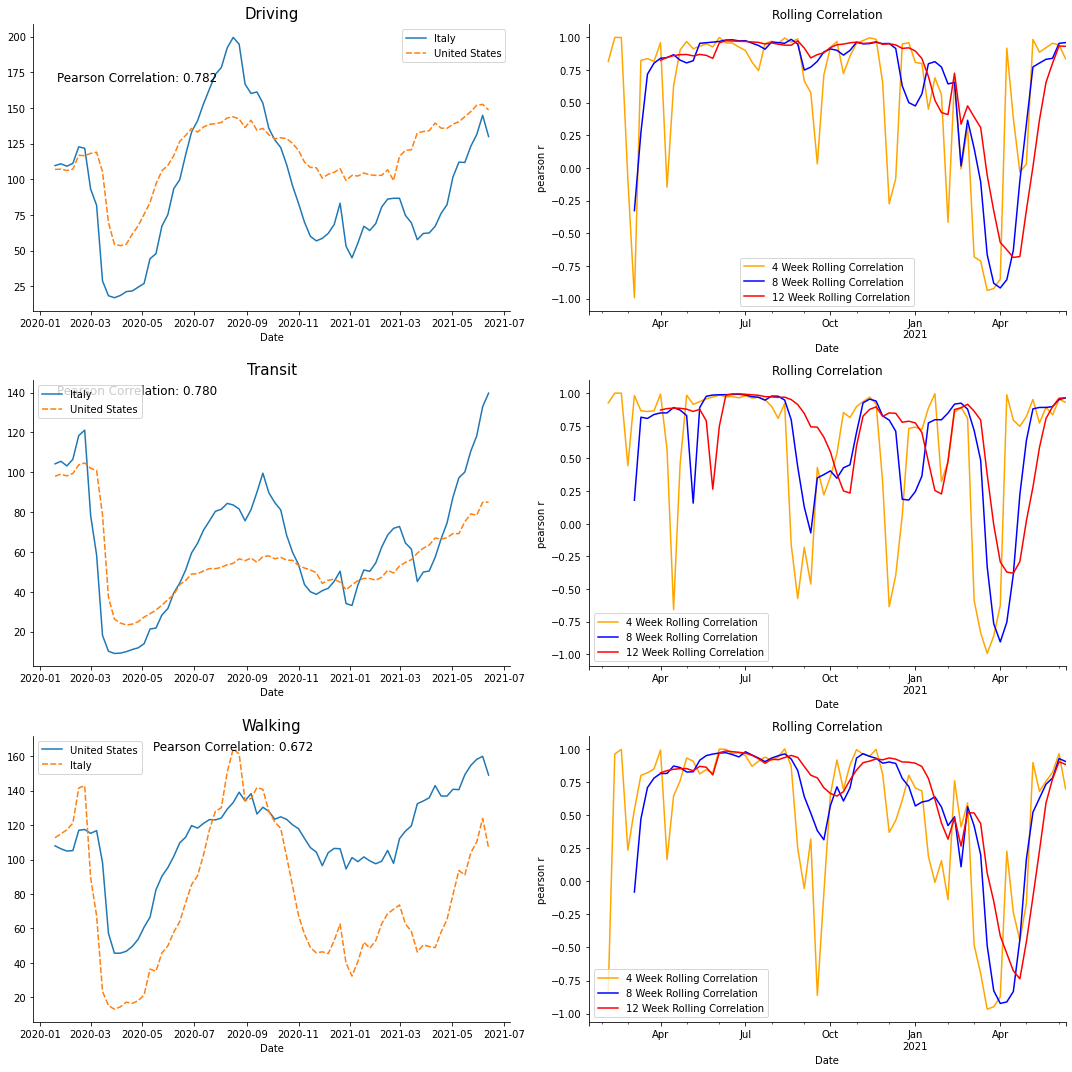

In [43]:
fig, axes = plt.subplots(figsize=(15,15), ncols=2, nrows=3)

axes[0][0].set_title('Driving', size=15)
df_driving = df_w.loc[:, idx[:,'driving']]

sns.lineplot(data=df_driving, ax=axes[0][0])
axes[0][0].text(x=.05, y=.8, fontsize=12, 
          s='Pearson Correlation: {:.03f}'.format(crosscorr(df_driving[country_1].driving,
                                                            df_driving[country_2].driving)),
          transform=axes[0][0].transAxes)

rolling_correlation_plot(df_w, country_1, country_2, axes[0][1], transportation_type='driving')

# Transit 
axes[1][0].set_title('Transit', size=15)
df_transit = df_w.loc[:, idx[:,'transit']]
sns.lineplot(data=df_transit, ax=axes[1][0])
axes[1][0].text(x=.05, y=.95, fontsize=12, 
          s='Pearson Correlation: {:.03f}'.format(crosscorr(df_transit[country_1].transit,
                                                            df_transit[country_2].transit)), 
          transform=axes[1][0].transAxes)
rolling_correlation_plot(df_w, country_1, country_2, axes[1][1], transportation_type='transit')  

# Walking 
axes[2][0].set_title('Walking', size=15)
df_walking = df_w.loc[:, idx[:,'walking']]
sns.lineplot(data=df_walking, ax=axes[2][0])
axes[2][0].text(x=.25, y=.95, fontsize=12, 
          s='Pearson Correlation: {:.03f}'.format(crosscorr(df_walking[country_1].walking,
                                                            df_walking[country_2].walking)), 
          transform=axes[2][0].transAxes)
rolling_correlation_plot(df_w, country_1, country_2, axes[2][1], transportation_type='walking') 
                                                        
sns.despine()
plt.tight_layout()

When looking at the correlation of each transportation type in isolation we notice a similar pattern than we did to the aggregated analysis that the positive correlation drops are we move into 2021. Walking has a correlation coefficent of 0.66 this is the lowest we've seen in all the analysis.

In [44]:
### Analysing Different transportations 

## Modelling with Data

### Data Cleansing

#### Addressing Missing Values
Below you can see we have 3 missing values

In [45]:
##
# Take the data from the United States, and prepare it for modelling... if any "choices" need to be made during the 
# clean-up process, briefly describe the options and why you chose the one you did. Do not remove the pandemic time 
# period from the data.

# Add code
# Describe choices in the clean up step

In [46]:
df = df_mobility[(df_mobility.region == 'United States') & 
                (df_mobility.transportation_type == 'driving')]

df = pd.melt(df, value_vars=list(df.columns[6:]), var_name='Date', value_name='mobility')
df['Date']= pd.to_datetime(df['Date'])
df['dayofweek'] = df.Date.dt.dayofweek
df.set_index('Date', inplace=True)

In [47]:
df['daily_pct_change'] = df.mobility.pct_change()

In [48]:
day_grouping = df.groupby('dayofweek').agg({'mobility': 'mean',
                             'daily_pct_change': 'mean'}).rename(columns={'mobility': 'Average Mobility Value'})

In [49]:
df[df.mobility.isnull()]

mobility  dayofweek  daily_pct_change
Date                                             
2020-05-11       NaN          0               0.0
2020-05-12       NaN          1               0.0
2021-03-12       NaN          4               0.0

<b>Does the day of the week influence the mobility?

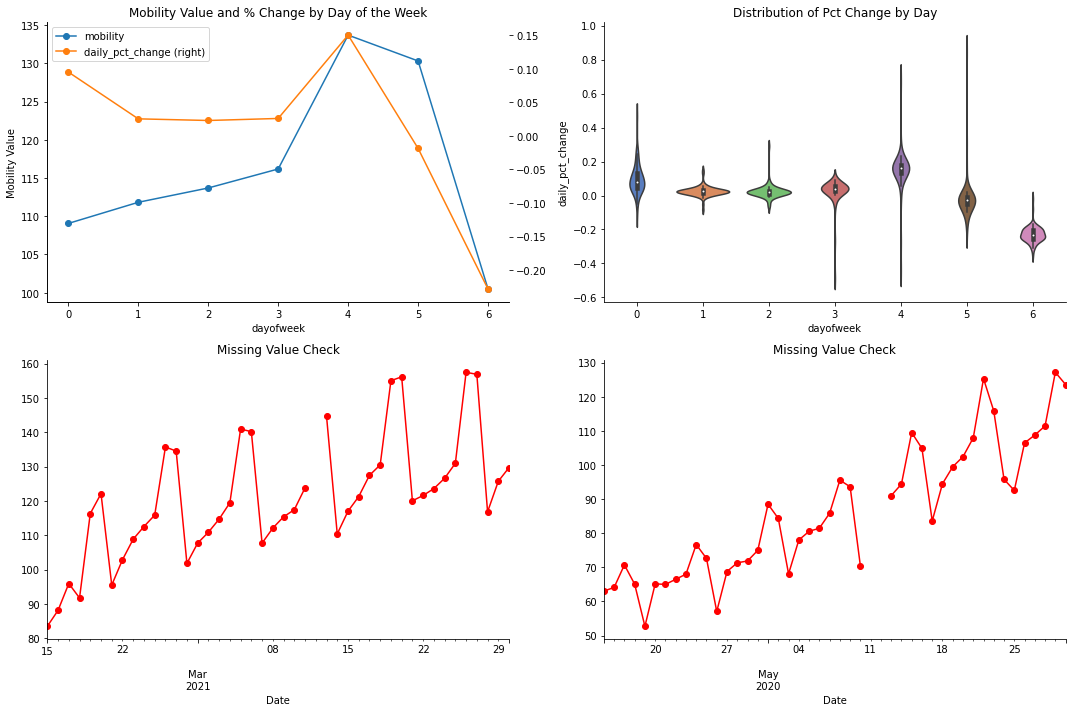

In [50]:
fig, axes = plt.subplots(figsize=(15,10), nrows=2, ncols=2)

# line plot day of week average and % change 
axes[0][0].set_title('Mobility Value and % Change by Day of the Week')
axes[0][0].set_ylabel('Mobility Value')
day_grouping = df.groupby('dayofweek').agg({'mobility': 'mean',
                             'daily_pct_change': 'mean'})
day_grouping.plot(secondary_y='daily_pct_change', marker='o', ax=axes[0][0])

# Pct Change Distribution by day
axes[0][1].set_title('Distribution of Pct Change by Day')
sns.violinplot(x="dayofweek", y="daily_pct_change",
                    data=df, palette="muted", title='Previous Day Pct Change', ax=axes[0][1])

# Visualising Missing Values
axes[1][0].set_title('Missing Value Check')
df['mobility'].loc['2021-02-15': '2021-03-30'].plot(ax=axes[1][0], color='r', marker='o')

axes[1][1].set_title('Missing Value Check')
df['mobility'].loc['2020-04-15': '2020-05-30'].plot(ax=axes[1][1], color='r', marker='o')


sns.despine()
plt.tight_layout()

#### Filling Na's

When looking at the Null Values within the Time series data we have to consider how we fill the missing values (assuming that we don't drop them). <br><br>
Looking at the temporal structure of the data the frequency is daily, we then have a look at how the day of the week influences the value. 
We see using the above plots that there is weekly seasonality with driving activity that seems to increase throughout the week until dropping on Sunday. With this in mind linear interpolation would not be an appropriate technique for the Friday missing value due to the usual drop in activity on the following days, however, for the missing values on the consequative Monday and Tuesday linear interpolation seems appropriate. 

- Another way we could have filled in the missing Friday would be to use the mean percentage increase from the Thursday and Friday, however, looking at the violin plot we see that the distribution has large tails.
<br><br>

<b>Method Used</b>

- Monday & Tuesday missing value: <b>Linear interpolation</b>
<br><br>
- Friday Missing Value: <b>Friday Specific Linear interpolation</b>.  


In [51]:
def weekly_interpolation(date, days_diff, day_of_week):
    mask = (df.mobility.isnull()) & (df.dayofweek == day_of_week)
    
    # get the dates of a week before and after the desired date
    earlier_date = pd.Timestamp(date) + dt.timedelta(days=-7)
    later_date = pd.Timestamp(date) + dt.timedelta(days=7)
    
    # interpolate the missing value
    interpolate_mob = df.loc[[earlier_date, pd.Timestamp(date), later_date]][['mobility']].interpolate()
    
    # replace null with interpolated value 
    df.loc[mask, 'mobility'] = interpolate_mob.loc[date].values[0]

In [52]:
weekly_interpolation('2021-03-12', 7, 4)

In [53]:
# Interpolate the two remaining null values
df.mobility = df.mobility.interpolate(method='linear')

#### Visualise Interpolated Nulls

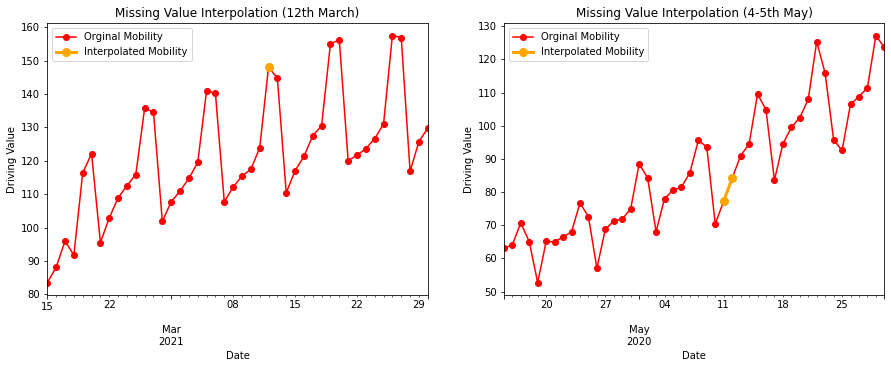

In [54]:
fig, axes = plt.subplots(figsize=(15,5), ncols=2)

axes[0].set_title('Missing Value Interpolation (12th March)')
df['mobility'].loc['2021-02-15': '2021-03-30'].plot(ax=axes[0], color='r', marker='o')
df['mobility'].loc['2021-03-12':'2021-03-12'].plot(ax=axes[0], color='orange', marker='o', lw=3, markersize=8)
axes[0].set_ylabel('Driving Value')
axes[0].legend(['Orginal Mobility', 'Interpolated Mobility'])

axes[1].set_title('Missing Value Interpolation (4-5th May)')
df['mobility'].loc['2020-04-15': '2020-05-30'].plot(ax=axes[1], color='r', marker='o')
df['mobility'].loc['2020-05-11': '2020-05-12'].plot(ax=axes[1], color='orange', marker='o', lw=3, markersize=8)
axes[1].legend(['Orginal Mobility', 'Interpolated Mobility'])
axes[1].set_ylabel('Driving Value')
plt.show()

### Outliers
---
Due to time constraints of the assessment, and the face that the dataset is small we can use human intervention to detect outliers, however, I usually like using facebook prophet to automatically detect outliers based on the uncertainty of the predicted value that will incorporate seasonality, trend as well as US holidays. 

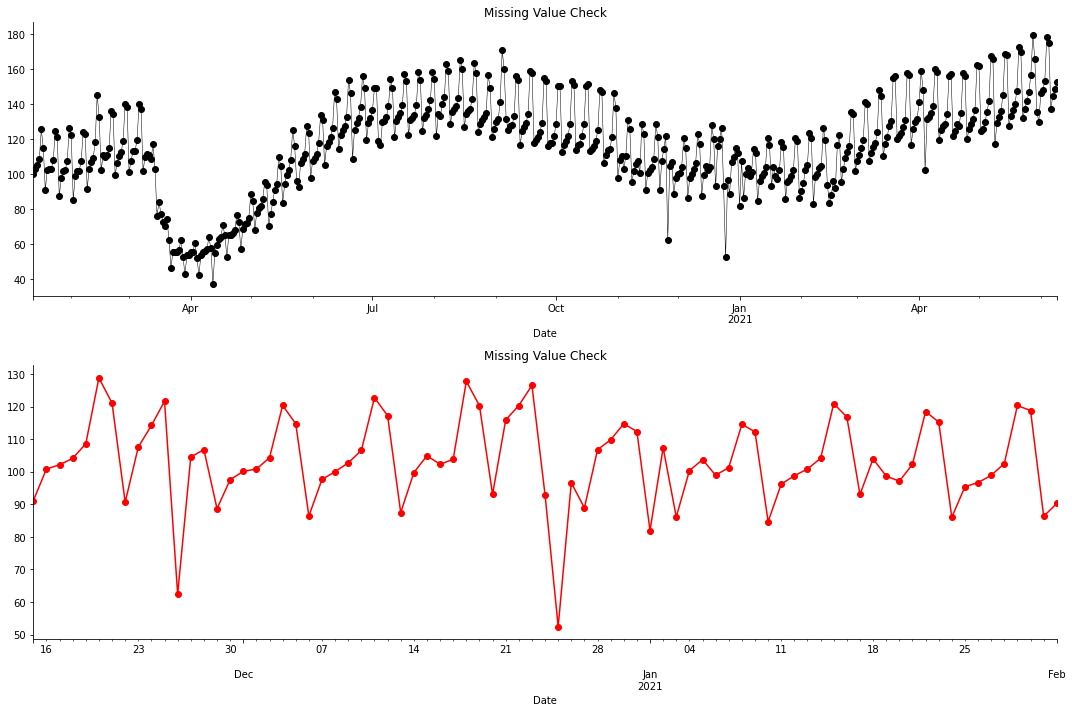

In [55]:
fig, axes = plt.subplots(figsize=(15,10), nrows=2)

# line plot day of week average and % change 
# Visualising Missing Values
axes[0].set_title('Missing Value Check')
df['mobility'].plot(ax=axes[0], color='black', lw=0.5, marker='o')

axes[1].set_title('Missing Value Check')
df['mobility'].loc['2020-11-15': '2021-02-01'].plot(ax=axes[1], color='r', marker='o')


sns.despine()
plt.tight_layout()

In [56]:
df.loc[['2020-11-26', '2020-12-25']]

mobility  dayofweek  daily_pct_change
Date                                             
2020-11-26     62.38          3         -0.487175
2020-12-25     52.44          4         -0.435583

In [57]:
df.loc[df.index.isin(['2020-11-26', '2020-12-25']), 'mobility'] = np.nan

In [58]:
weekly_interpolation('2020-11-26', 7, 3)
weekly_interpolation('2020-12-25', 7, 4)

In [59]:
df.loc[['2020-11-26', '2020-12-25']]

mobility  dayofweek  daily_pct_change
Date                                             
2020-11-26    106.44          3         -0.487175
2020-12-25    104.84          4         -0.435583

Lets select the 25th of December which is Christmas Day, however, models such as FB prophet have the understanding of US holidays and therefore wouldn't need to be sorted. We can also see that the 26th of Nov 2020 is an outlier which is Thanks Giving in the US. We will replace them with the linear interpolation similar to how we addressed the nulls. 

### Time Series decomposition
---
To get an idea of the trends and seasonality if any are in the data. This will also help us choose the model for forecasting. 

In [60]:
df_w = df.resample('w').mean()
df_w.shape

(74, 3)

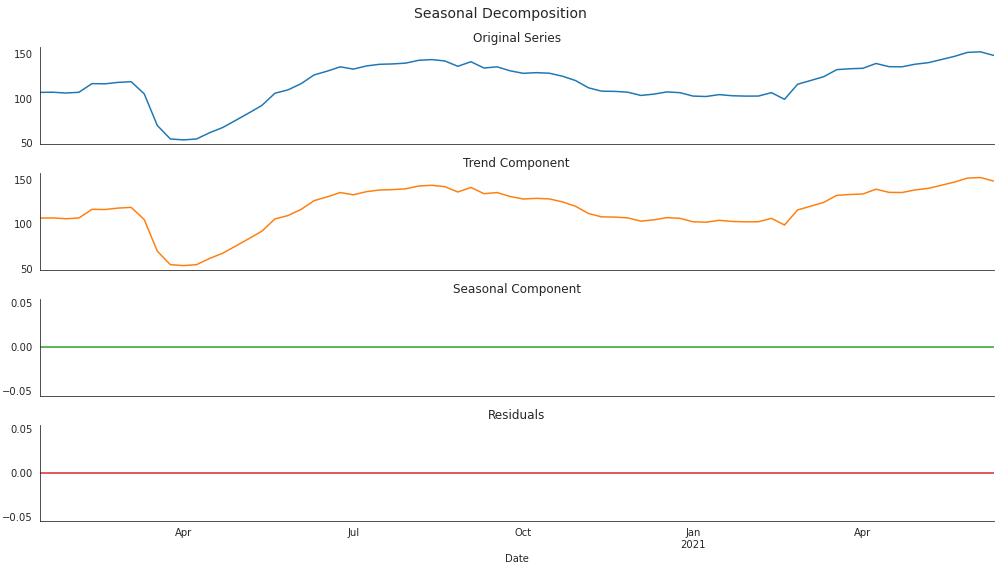

In [61]:
components = tsa.seasonal_decompose(df_w['mobility'], model='addative', period=1)

ts = (df_w['mobility'].to_frame('Original')
      .assign(Trend=components.trend)
      .assign(Seasonality=components.seasonal)
      .assign(Residual=components.resid))
with sns.axes_style('white'):
    ts.plot(subplots=True, figsize=(14, 8), title=['Original Series', 'Trend Component', 'Seasonal Component','Residuals'], legend=False)
    plt.suptitle('Seasonal Decomposition', fontsize=14)
    sns.despine()
    plt.tight_layout()
    plt.subplots_adjust(top=.91);

### Model Choice
Given that the information spans only a year and having been re-sampled we only have 72 data points. This limits the types of models that we can use for forecasting.
Looking at the time series decomposition we notice that there isn't any seasonality. This may not be the case had COVID not happened as theres a phenomenon known as 'driving season' which refers to the summer period in the northern hemisphere where the demand for gasoline increase as people drive more. 
<br><br>
There are some simple methods that we can use such as 
- linear regression 
- Simple Exponential Smoothing
- Holt Winters
- AR
- MA
<br><br>
However, models such as the Exponential smoothing will lag as the trend evolves which means that forecasting may not be a good option especially for longer periods of time. 
<br><br>
We will be using the <b>ARIMA</b> which is a model that uses the series past values to predict future values that utilises auto correlation and partial auto correlation. 
given the lack of seasonal influence we wont be using the SARIMA model.

<b>Stationary</b>: Before applying the ARIMA model we need the Time series to be stationary. 
- Constant Mean
- Constant Variance
- Auto Covariance

One of the reasons for this is that, if a Time Series has a particular behavior over a time interval, then there's a high probability that over a different interval, it will have same behavior, provided Time Series is stationary. 

<b>Transforming a time series to achieve stationarity</b> 
common transformations:
1. Natural logarithm
2. Differencing 

If a univariate series becomes stationary after differencing d times, it is said to be integrated of the order of d, or simply integrated if d=1. This behavior is due to unit roots.

<b>Augmented Dickey Fuller test (ADF)</b> evaluates the null hypothesis that a time series sample has a unit root against the alternative of stationarity. 

In [62]:
model_df = df_w[['mobility']].copy()
us_log = np.log(model_df)
us_diff = model_df.diff().dropna()
us_double_diff = us_diff.diff().dropna()

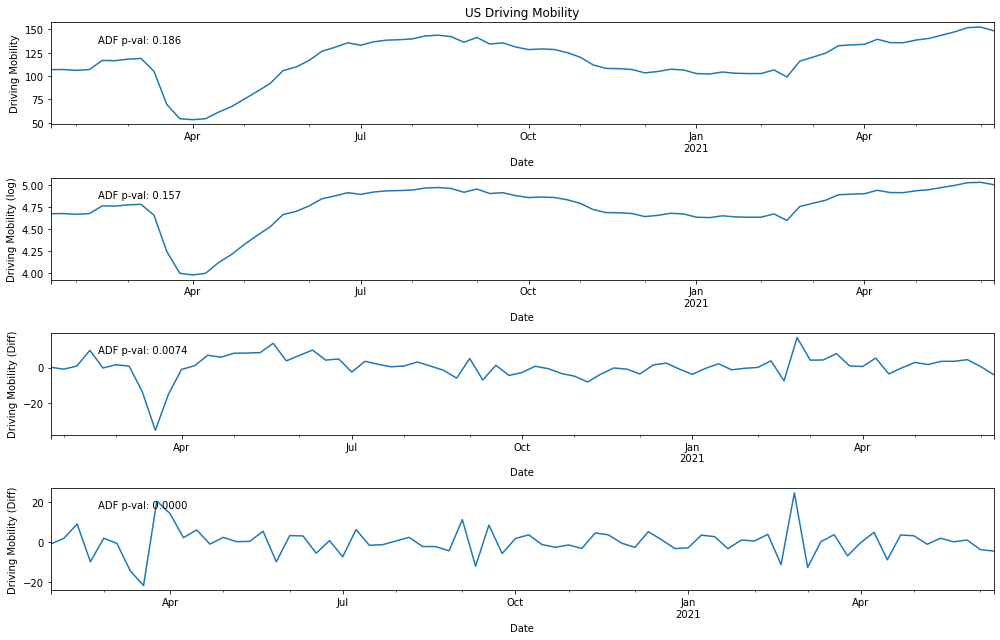

In [63]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(14, 9))

model_df['mobility'].plot(ax=axes[0], title='US Driving Mobility')
axes[0].text(x=.05,
                    y=.8,
                    s=f'ADF p-val: {tsa.adfuller(model_df.dropna())[1]:.3f}',
                    transform=axes[0].transAxes)
axes[0].set_ylabel('Driving Mobility')


# Log Plot
us_log['mobility'].plot(ax=axes[1])
axes[1].text(x=.05,
                    y=.8,
                    s=f'ADF p-val: {tsa.adfuller(us_log.dropna())[1]:.3f}',
                    transform=axes[1].transAxes)
axes[1].set_ylabel('Driving Mobility (log)')

# Diff Plot 
us_diff['mobility'].plot(ax=axes[2])
axes[2].text(x=.05,
                    y=.8,
                    s=f'ADF p-val: {tsa.adfuller(us_diff.dropna())[1]:.4f}',
                    transform=axes[2].transAxes)
axes[2].set_ylabel('Driving Mobility (Diff)')

# Double Diff 
us_double_diff['mobility'].plot(ax=axes[3])
axes[3].text(x=.05,
                    y=.8,
                    s=f'ADF p-val: {tsa.adfuller(us_double_diff.dropna())[1]:.4f}',
                    transform=axes[3].transAxes)
axes[3].set_ylabel('Driving Mobility (Diff)')

plt.tight_layout()

### 

In [64]:
def arima_plots(data, lags=30, title=None):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))
    
    # residuals
    data.plot(ax=axes[0][0], title='Residuals')
    data.rolling(16).mean().plot(ax=axes[0][0], c='k', lw=1)
    q_p = np.max(q_stat(acf(data, nlags=lags), len(data))[1])
    stats = f'Q-Stat: {np.max(q_p):>8.2f}\nADF: {adfuller(data)[1]:>11.2f}'
    axes[0][0].text(x=.02, y=.85, s=stats, transform=axes[0][0].transAxes)
    
    # Probability Plot
    probplot(data, plot=axes[0][1])
    mean, var, skew, kurtosis = moment(data, moment=[1, 2, 3, 4])
    s = f'Mean: {mean:>12.2f}\nSD: {np.sqrt(var):>16.2f}\nSkew: {skew:12.2f}\nKurtosis:{kurtosis:9.2f}'
    axes[0][1].text(x=.02, y=.75, s=s, transform=axes[0][1].transAxes)
    
    # acf
    plot_acf(x=data, lags=lags, zero=True, ax=axes[1][0])
    axes[1][1].set_xlabel('Lag')
    
    # pacf
    plot_pacf(data, lags=lags, zero=True, ax=axes[1][1])
    axes[1][0].set_xlabel('Lag')
    
    fig.suptitle(title, fontsize=14)
    sns.despine()
    fig.tight_layout()
    fig.subplots_adjust(top=.9)

- <b>Auto Correlation Function (ACF)</b>: The correlation between the observations at the current point in time and the observations at the previous points in time. We use ACF to determine the optimal number of MA terms.
- <b>Partial Auto Correlation (PACF)</b>: Displays the correlation between observations made at two points in time while accounting for any influence from other data points.  We can use PACF to determine the optimal number of terms to use in the AR model. The number of terms determines the order of the model.

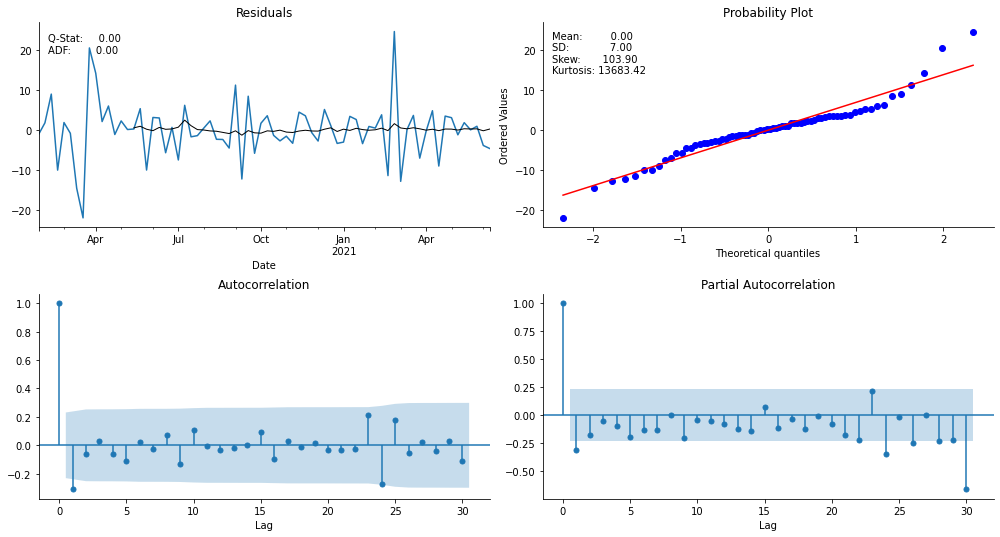

In [65]:
arima_plots(us_double_diff['mobility'])

Looking at the weekly US driving mobility time series we notice a outliers at the start of the covid lockdown, this is seen on the skew of the Q-Q plot with more extreme values than the normal distribution would suggest. 

looking at the ACF and PCF plots, appropriate values for the P and Q terms are both 1. This is whilst using a difference of 2.  

A quick and easy way to look at the p,d,q parameter values to use is to train the model over various combinations and see which one has the least AIC or BIC score, below I'll do that with a rolling training window with a restricted number of combinations to save time. 

In [66]:
##
# Create a model that predicts the next week's average driving mobility in the US. Evaluate the accuracy of your model, 
# and briefly dicuss whether it is a "good" model or not. No need to try and optimize the accuracy at this stage.

# Add code
# Add comentary on the quality of the model

In [67]:
from statsmodels.tsa.arima_model import ARIMA

In [68]:
train = model_df[:-10]
test = model_df[-10:]

In [69]:
model_df.shape

(74, 1)

### Finding Values for p, d, q with rolling window forecasting

Note: The train, test and rolling window have been chosen to speed up the code. 

In [70]:
%%time
p=range(0,3)
q=range(0,3)
d=range(1,3)

pdq_combination=list(itertools.product(p,d,q))

train_size = 25
aic = []
bic = []
combination = []
for pdq in pdq_combination:
    for T in range(train_size, len(train)):
        train_set = train.iloc[T-train_size:T]
        try:
            model=ARIMA(train_set, order=pdq)
            model_fit = model.fit()
            aic.append(model_fit.aic)
            bic.append(model_fit.bic)
            combination.append(pdq)
        except:
            # model wont run when p and q = 0 
            continue

CPU times: user 21.2 s, sys: 64.4 ms, total: 21.3 s
Wall time: 21.3 s


We notice that the model with the order (1,2,1) has the least AIC and BIC values. I'll train that on the full training set and see how it performs against the test set. I'd like to make sure that the model isnt coming out with any red flag predictions. 

<b>AIC</b>: The Akaike Information Critera (AIC) is a used measure of a statistical model. It quantifies the goodness of fit, and  the simplicity, of the model into a single statistic. 

<b>BIC</b>: Bayesian Information Criterion. BIC is an estimate of a function of the posterior probability of a model being true, under a certain Bayesian setup, so that a lower BIC means that a model is considered to be more likely to be the true model

Unlike the AIC, the BIC penalizes the model more for its complexity, meaning that more complex models will have a worse (larger) score and will, in turn, be less likely to be selected.

#### Metric Scores

In [71]:
results = pd.DataFrame({'order': combination, 'aic': aic, 'bic': bic})
average_results = results.groupby('order').agg({
    'aic': 'mean', 'bic': 'mean'}).sort_values(by='aic')
average_results.head()

aic         bic
order                            
(1, 2, 1)  138.278924  142.820901
(1, 2, 2)  140.232488  145.909960
(0, 2, 1)  140.535324  143.941807
(0, 2, 2)  140.737153  145.279130
(2, 2, 1)  143.727933  149.405404

#### Model Summary

In [72]:
model = ARIMA(train, order=(1, 2, 1))  
fitted = model.fit()  
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D2.mobility   No. Observations:                   62
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -204.017
Method:                       css-mle   S.D. of innovations              6.340
Date:                Sun, 13 Jun 2021   AIC                            416.034
Time:                        11:44:44   BIC                            424.543
Sample:                    02-02-2020   HQIC                           419.375
                         - 04-04-2021                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0225      0.084      0.269      0.788      -0.141       0.186
ar.L1.D2.mobility     0.4986      0.112      4.438      0.000       0.278       0.719
ma.L1.D2.mobility    -1.0000      0.047    -21.209      0.000      -1.092      -0.908
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.0057           +0.0000j            2.0057            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

All the AR and MA coefficients are significant

### Forecasts

As you can see the model under-predicts the US driving mobility. I this case, however, the this ARIMA model is very dependent on its previous data point so if the most recent point was an anomaly or even went against the current trend the model would struggle to forecast appropriately. 

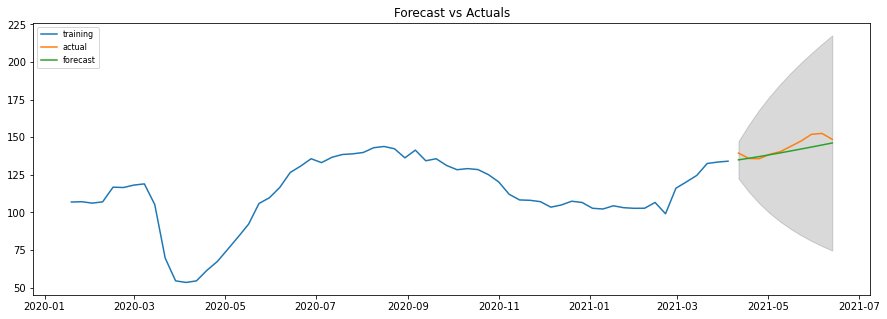

In [73]:
fc_test, se, conf = fitted.forecast(len(test), alpha=0.05)  # 95% conf

fc_series = pd.Series(fc_test, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(15,5))
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

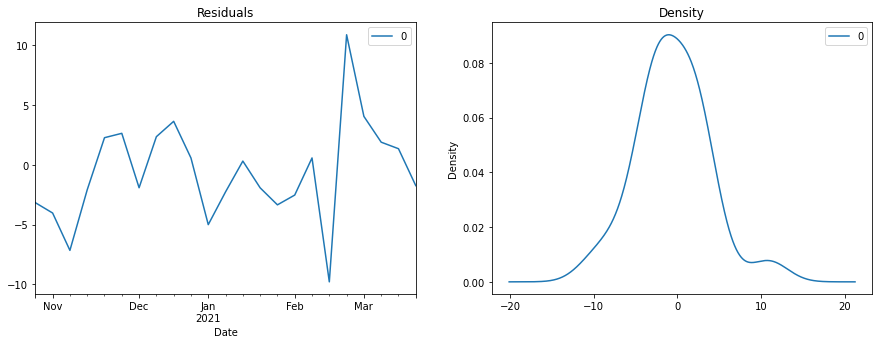

In [74]:
residuals = pd.DataFrame(model_fit.resid)

fig, ax = plt.subplots(1,2, figsize=(15,5))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])

plt.show()

In [75]:
# Train on full dataset for next weeks prediction
model = ARIMA(model_df, order=(1, 2, 1))  
fitted = model.fit()  
future_fc, se, conf = fitted.forecast(1, alpha=0.05)

- The residuals though not many dont seem to have a pattern
- The residual errors seem ok with near zero mean and uniform variance, We would expect the plot to be random around the value of 0 and not show any trend or cyclic structure.

In [76]:
print('The predicted US driving mobility for next week is: {:.2f} with a standard error of {:.2f} ({:.2f} - {:.2f})'\
      .format(future_fc[0], se[0], conf[0][0], conf[0][1]))

The predicted US driving mobility for next week is: 147.32 with a standard error of 6.01 (135.53 - 159.10)


### Model Accuracy

#### In sample lagged values 

this plot shows the model predictions get trained up until the previous value to make the next prediction this can make the fited forecast and actuals look artificially good

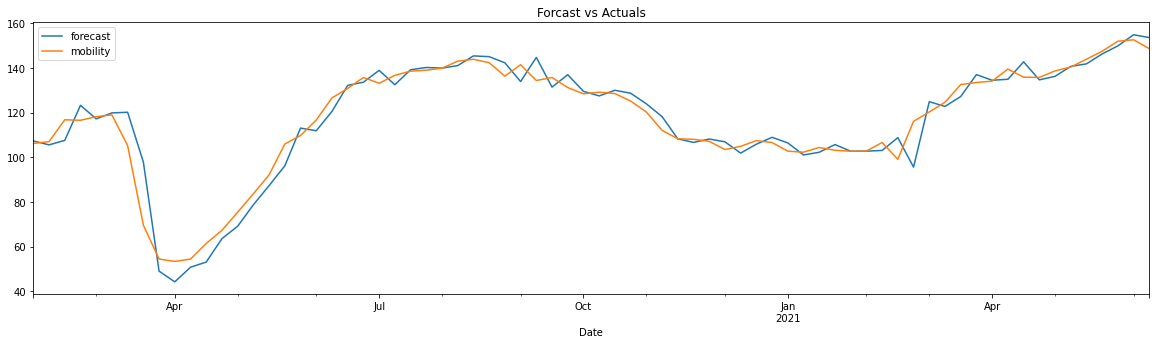

In [77]:
fig, ax = plt.subplots(figsize=(20,5))
fitted.plot_predict(dynamic=False, ax=ax)
ax.set_title('Forcast vs Actuals')
plt.show()

In [78]:
def model_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr

    return({'mape':mape, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr,})

### Test set Evaluation metrics

In [79]:
model_accuracy(fc_test, test.mobility)

{'mape': 0.0231308894836512,
 'mae': 3.40996942333216,
 'mpe': -0.020807867221051525,
 'rmse': 4.447552716995083,
 'corr': 0.9006723256388426}

#### Is this model good?
---
It's worth mentioning that this is a simple model with little training and optimisation, however, the results seem reasonable and the evaluation metrics produce no red flags that should raise concern. Some of these metrics, however, such as RMSE work well when comparing models and other techniques which we havn't done. Evaluation metrics such as MAPE are easy interpret as its the mean absolute error expressed as a percentage which our value was 0.034 suggesting that the model predictions were on average 3.4% off actual values over the test set. The correlation metric suggests that the model performed well at predicting the direction of the US driving changes, however, a change in the fundamentals of the populations behavior could completely change the future values which the model wouldn't be able to account for.

- To determine whether a model good/adequate I feel requires an understanding of the use case for the model predictions. If you have to be very accurate with your prediction where being missing the actual result by over 1% is very costly then this model would not be considered good/adequate. Conversely if the model is used to estimate broadly the direction of travel and the margin for error is larger then this model could be considered good, however, its worth stressing the dangers of longer period predictions.


- The forecasted plots show that the model performs "good" when the forecasting horizon is short, when trying the forecast further into the future the models confidence reduces.


- If this was deployed it would be best to iteratively produce a rolling forecast for a short time horizon. 


- Another model that may have been worth comparing/fitting would have been combining the ARIMA model with a GARCH (Generalized AutoRegressive Conditional Heteroskedasticity) model that forecasts the conditional variance. Not by fitting the GARCH model on the ARIMA residuals but rather by modelling them simultaneously.

In [80]:
## 
# If you had a longer history of data, would you have chosen a different model? If so describe why, and provide a few
# lines of pseudo code that display how training/evaluating that model would look if you had the appropriate data.

# Add Code 
# Add Comments 


### More Historical Data? 

If we had a longer history of data that would have allowed more options for alternative models such as... 


- <b>SARIMA</b> this is similar to the ARIMA model that we used, however, incorporates a seasonal component. Due to the widely known seasonality of driving as mentioned before, one would expect that having more data that doesnt have such a large influence of covid would enable the use of this model. We could also combine these predictions with a GARCH model to incorperate conditional volatility. 


- <b>FBprophet</b>: Depending on the use case fbProphet can be a great model to use as its very easy to apply and captures yearly, weekly and daily seasonality as well as holiday effects. The data provided was daily and this is what this model works best with. 


- <b>LSTM</b> Which work on larger datasets and can work on univariate time series, multivariate time series as well as multi-step time series. They do, however, have some draw backs such as computational costs, overfitting etc. If we were able to capture other external datasets or have other independent variables this model would work well, due to its multivariate capabilities. 


After mentioning that the LSTM can work on multivariate time series, its worth noting that with the use of other pieces of information whether it be external or the use of other countries numbers that may be a leading indicator to the US driving patterns we could use models such as <b>VAR</b> (Vector Auto Regression)


Following the discussion of other models we may be able to use, I think the choice would come down to the use case and what fits the business needs most. Speed, interpretability etc may be primary influences for the model choice. 


--- 
### Training/Evaluation if dataset was larger
- Firstly I'd partition the data into Training, Validation and Test data. 


- To try and reduce overfitting, help evaluate and optimise the model/s I'd use a nested walking cross validation. Nested cross validation helps with generalization issues that regular cross validation can experience. I'd also use a walk forward cross validation similar to what I did earlier to help choose the lag parameters of the ARIMA model is to try and capture the temporal dependencies.


- As well as using generic model evaluation metrics, I'd like to incorporate the testing on business metrics and see how the model performs historically based on what the business defines success as, whether that be profit etc. 

- Once the model parameters are confirmed I'd then train the model on the Training and Validation datasets and review the performance on the test set. 



## Increasing Prediction Granularity 
---
Now the time horizons and granularity has changed in the case of the arima model, it's easier to create a basic FBprophet model that captures the varying levels of seasonality without the needs to clean the data etc that I would need to do with the ARIMA model. 

In [81]:
## Extra Credit

# Change the prediction granularity of your model to daily, and try predicting different time horizons
# (1 day, 7 days, 30 days, and 90 days). 
# Add code
# Add commentary

In [82]:
# prep data
model_df = df[['mobility']].reset_index()
model_df.columns = ['ds', 'y']

In [83]:
train = model_df[:-60]
test = model_df[-60:]

## Prophet 

### Adding Custom Seasonality

Increasing the number of Fourier terms allows the seasonality to fit faster changing cycles, but can also lead to overfitting: N Fourier terms corresponds to 2N variables used for modeling the cycle. This will also increase the uncertainty. 

In [84]:
# define model
model = Prophet(growth='linear', seasonality_mode='multiplicative',
               yearly_seasonality=False, weekly_seasonality=False)

#add US holidays
model.add_country_holidays(country_name='US')

# Add fourier for custom weekly seasonatility default order is 3 and increasing runs the risk of overfitting.
model.add_seasonality(name='weekly',
                      period=7,
                      fourier_order=6,
                      )

#Fit model
model.fit(train)
future = model.make_future_dataframe(periods=len(test), freq='d')

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [85]:
forecast_test = model.predict(future)

In [86]:
fc_vs_act = pd.merge(test, forecast_test[['ds', 'yhat']]).rename(columns={'y': 'Actual', 
                                                                          'yhat': 'Predicted'})
fc_vs_act['residual'] = fc_vs_act['Actual'] - fc_vs_act['Predicted']

### Forecasted vs Actuals

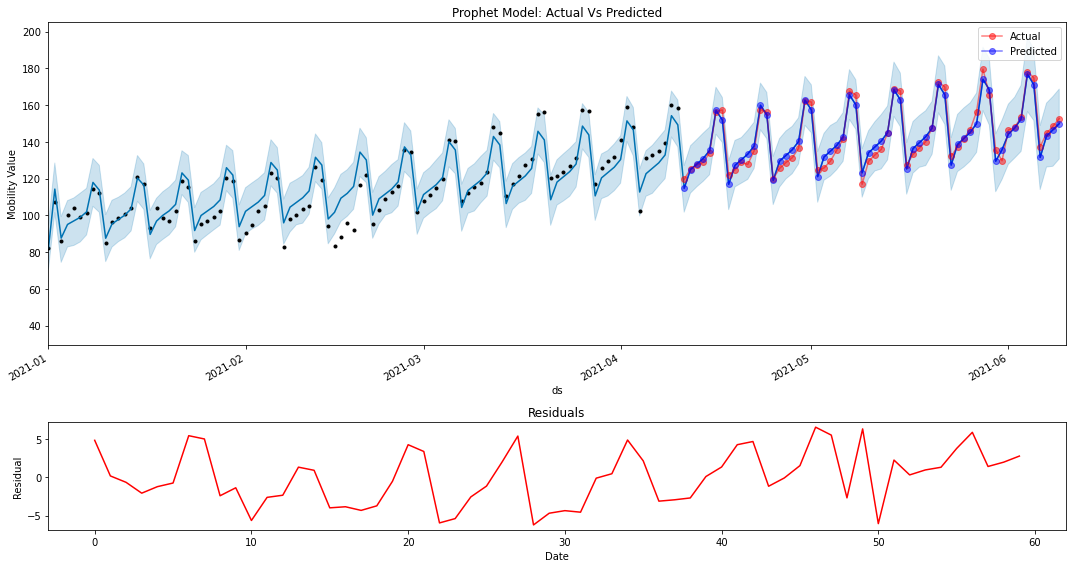

In [87]:
fig, ax = plt.subplots(figsize=(15,8), nrows=2, gridspec_kw={'height_ratios': [3, 1]})

# Forecast 
model.plot(forecast_test, xlabel='Date', ylabel=r'Mobility Value', ax=ax[0])

# actuals
fc_vs_act.drop('residual', axis=1).set_index('ds').plot(ax=ax[0], color=['r', 'b'], marker='o', alpha=0.5)

# xlim
ax[0].set_xlim([pd.Timestamp('2021-01-01'), pd.Timestamp('2021-06-10')])

ax[0].set_title('Prophet Model: Actual Vs Predicted')


# Residual Plot
fc_vs_act['residual'].plot(ax=ax[1], color='r')

ax[1].set_title('Residuals')
ax[1].set_ylabel('Residual')
ax[1].set_xlabel('Date')

plt.tight_layout()
plt.show()

You can see here that the model struggles to predict some of the extreme movements seen on the friday and saturdays of Q2.

<b>Evaluation metrics</b>

In [88]:
model_accuracy(forecast_test.iloc[-len(test):]['yhat'], test['y'])

{'mape': 0.021513886934579608,
 'mae': 3.0016447935566153,
 'mpe': 0.0010027192894173037,
 'rmse': 3.5655496278536027,
 'corr': 0.9784861491974138}

### Prophet model on all data

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


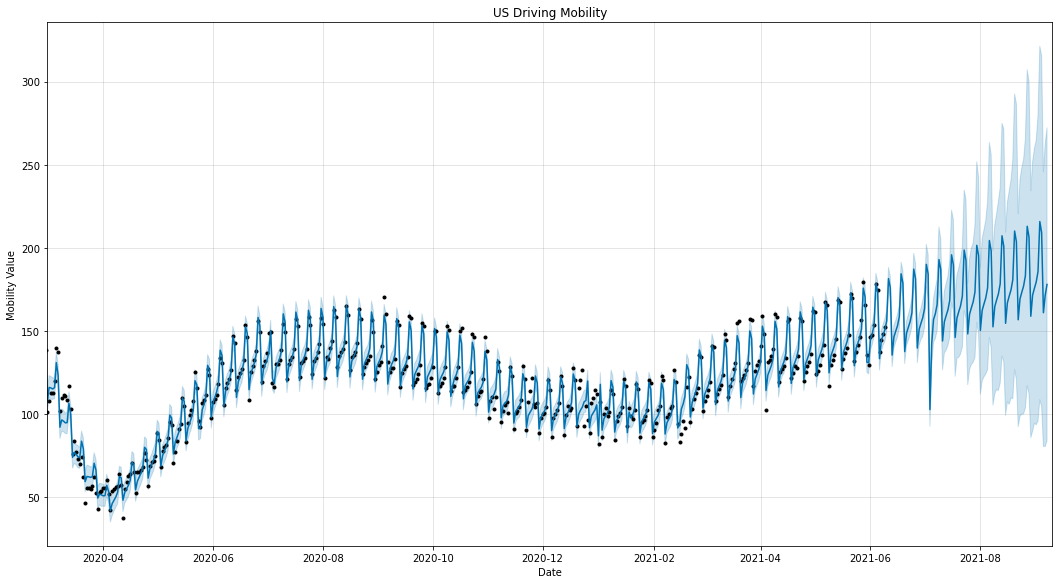

In [89]:
# define model
model = Prophet(growth='linear', seasonality_mode='multiplicative')

#add US holidays
model.add_country_holidays(country_name='US')

# Custom Seasonality 
model.add_seasonality(name='weekly',
                      period=7,
                      fourier_order=8,
                      )
#Fit model
model.fit(model_df)
future = model.make_future_dataframe(periods=90, freq='d')

# Forecast
forecast = model.predict(future)

# Plot Forecast
fig, ax = plt.subplots(figsize=(15,8))

model.plot(forecast, xlabel='Date', ylabel=r'Mobility Value', ax=ax)
ax.set_xlim([pd.Timestamp('2020-03-01'), pd.Timestamp('2021-09-10')])
plt.title('US Driving Mobility')
plt.show()

#### Plotting the Seasonal components

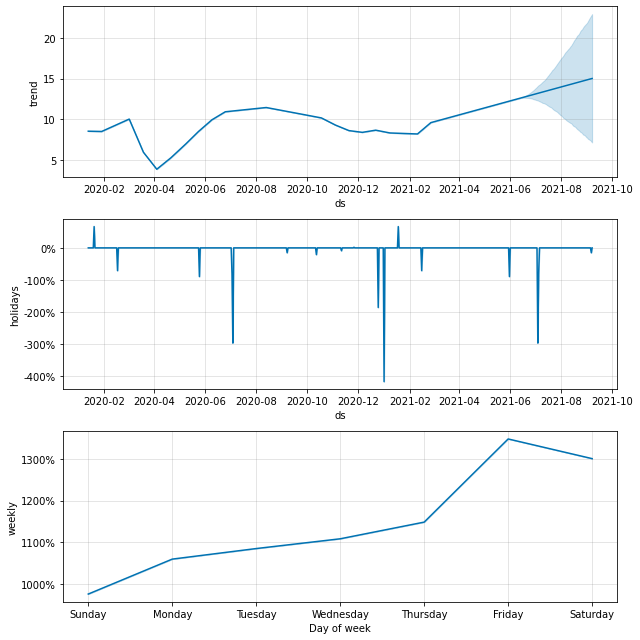

In [90]:
fig2 = model.plot_components(forecast)
plt.show()

Similar to what we noted on when filling in the missing values there is daily seasonality in the dataset.

In [91]:
forecast_dates = []
forecast_dates.append(model_df.iloc[-1]['ds'] + dt.timedelta(days=1))
forecast_dates.append(model_df.iloc[-1]['ds'] + dt.timedelta(days=7))
forecast_dates.append(model_df.iloc[-1]['ds'] + dt.timedelta(days=30))
forecast_dates.append(model_df.iloc[-1]['ds'] + dt.timedelta(days=90))

In [92]:
forecast.set_index('ds', inplace=True)

### Predictions (1 Day, 7 Day, 30 Day and 90 Day)

In [93]:
forecast.loc[forecast_dates][['yhat', 'yhat_lower', 'yhat_upper']]

yhat  yhat_lower  yhat_upper
ds                                            
2021-06-10  156.186702  149.468285  162.459993
2021-06-16  153.231180  146.464922  159.996299
2021-07-09  192.969154  174.251259  212.556038
2021-09-07  178.019052   84.033128  272.187935

#### Prediction Plot

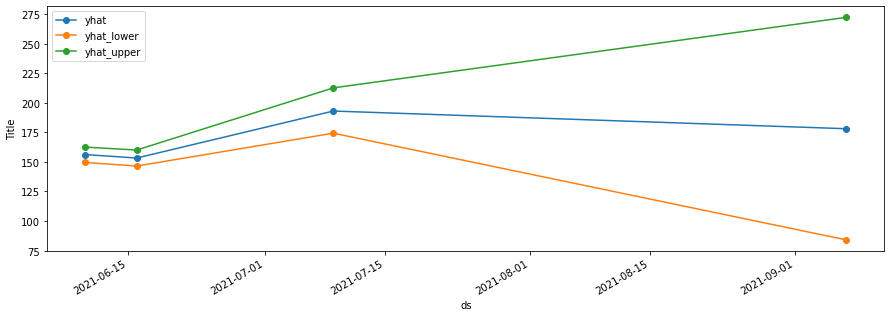

In [94]:
fig, axes = plt.subplots(figsize=(15,5))
forecast.loc[forecast_dates][['yhat', 'yhat_lower', 'yhat_upper']].plot(marker='o', ax=axes)
axes.set_ylabel('US Mobility Forecast')
axes.set_ylabel('Title')
plt.show()

As you can see below the facebook prophet interprets holidays.

In [95]:
model.train_holiday_names

0                  New Year's Day
1      Martin Luther King Jr. Day
2           Washington's Birthday
3                    Memorial Day
4                Independence Day
5     Independence Day (Observed)
6                       Labor Day
7                    Columbus Day
8                    Veterans Day
9                    Thanksgiving
10                  Christmas Day
11      New Year's Day (Observed)
12       Christmas Day (Observed)
dtype: object

<b>Do you think any of these models are suitable for "production"?</b>:

As mentioned above, the suitability of the models for production depends very much on the use case the business want it to be used for. Again, if the margin for error is small and the cost of error is large, using the model needs to be approached with caution. I also wouldn't productionise the model until it's been evaluated on business metrics. For example if the data here is used to predict the demand for gasoline and trades where being executed based off of the model, one should back test the model against the trades that would have been executed (this example is simplistic in theory and likely isn't easy to replicate, however, I'm trying to mention the importance of measuring the estimated cost/benefit of the model in the wild). As we know with time series forecasting, the longer the forecasted time horizon the higher the uncertainty and a use case that requires a long time horizon this model may not be adequate for. The results seem reasonable based on the evaluation metrics so we know that the forecasts hold some good credability for shorter time horizons.

<b>How would you convince someone else of the relative quality of the models of different time horizons?</b>:

Depending on the appetite for a technical understanding of the model and the background of the stack holder that I'm trying to convince, the approach would differ. A lot of stakeholders like to understand the fundamentals behind the model, asking why/how are you coming up with the forecasts you are seeing?

Steps taken:

1. Show the stakeholder the data (likely a plot).
2. I'd then walk them through the seasonal decomposition, to help them understand the time series. 
3. If the model is an ARIMA model I'd then walk them through the idea behind the autocorrelation and partial autocorrelation and the influence that previous values have on the future. If the model was the FBprophet I'd show them through the additive components. 
4. Id then show them the test results and the residual errors to help them understand the model pros/inefficiencies and where it falls short in this case that the longer the horizons the greater the uncertainty. In the prophet model I'd highlight the more volatile data points seen at the start and end of the week that the model can struggle to predict, hence the higher fourier order on the weekly seasonality.
5. Run the stakeholder through interpretable evaluation metrics such as the MAPE, Correlation etc allows them to understand the accuracy of the model. If we had any business evaluation metrics I'd also show them those. 
6. Lastly highlighting the fact that the uncertainty of the model predictions increase the longer the horizon making sure they understand the risks of using such predictions is key.